In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
data1 = pd.read_excel('D:/DS_Project/Dataset.xlsx',
                        sheet_name=['Dealers','Customers','Claims','Parts','Transactions','Vendors'])

In [4]:
dealers = data1.get('Dealers')
customers = data1.get('Customers')
claims = data1.get('Claims')
parts = data1.get('Parts')
transactions = data1.get('Transactions')
vendors = data1.get('Vendors')

In [5]:
dealers['Dealer_ID'] = dealers['Dealer_ID'].fillna(0).astype(int)

In [6]:
dealers['ZIpCode'] = dealers['ZIpCode'].fillna(0).astype(int)

In [7]:
dealers

,Dealer_ID,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,Kenneth Schmitt,india,Goa,Panji,400001
1,2,Owen Mclaughlin,india,Delhi,Naoida,400002
2,3,Donald Repinski,india,Karnataka,Bangalore,400003
3,4,Rachel Oszust,india,Gujrat,Ahemdabad,400004
4,5,Lynn Knapp,india,Orrisa,Cuttack,400005
...,...,...,...,...,...,...
1995,1996,Darleen Sullivan,india,Karnataka,Bangalore,400003
1996,1997,Bobbie Dretzka,india,Gujrat,Ahemdabad,400004
1997,1998,Colin Wiggins,india,Orrisa,Cuttack,400005
1998,1999,Marie Groves,india,Maharashtra,Mumbai,400006


In [8]:
dealers.rename(columns = {'ZIpCode':'zipcode'}, inplace = True)

In [9]:
customers['Cust_ID'] = customers['Cust_ID'].fillna(0).astype(int)

In [10]:
customers['Dealer_ID'] = customers['Dealer_ID'].fillna(0).astype(int)

In [11]:
customers['ZipCode'] = customers['ZipCode'].fillna(0).astype(int)

In [12]:
customers

,Cust_ID,Cust_Name,Dealer_ID,Country,State,City,ZipCode
0,101,pushpak,1,ind,goa,panaji,402201
1,102,raj,3,ind,karnataka,banglore,403315
2,103,ranbir,4,ind,gujrat,ahemadabad,326665
3,104,reyansh,5,ind,orrisa,cuttack,543211
4,105,raunak,2,ind,delhi,noida,426232
...,...,...,...,...,...,...,...
287995,287996,Michael,5,ind,delhi,noida,426232
287996,287997,Tim,4,ind,maharashtra,mumbai,215432
287997,287998,Laurie,5,ind,orrisa,cuttack,543211
287998,287999,Katie,2,ind,karnataka,banglore,403315


In [13]:
customers.rename(columns = {'ZipCode':'zipcode'}, inplace = True)

In [14]:
claims['Dealer_ID'] = claims['Dealer_ID'].fillna(0).astype(int)

In [15]:
claims['claim_id'] = claims['claim_id'].fillna(0).astype(int)

In [16]:
claims['claim_amount'] = claims['claim_amount'].fillna(0).astype(int)

In [17]:
claims['Cust_ID'] = claims['Cust_ID'].fillna(0).astype(int)

In [18]:
claims['Part_ID'] = claims['Part_ID'].fillna(0).astype(int)

In [19]:
claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr
...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc
20091,20092,2021-01-24,36000,1275,43975,907,rplc
20092,20093,2021-01-24,46000,1276,43976,905,rplc
20093,20094,2021-01-24,56000,1277,43977,904,rplc


In [20]:
parts['Part_ID'] = parts['Part_ID'].fillna(0).astype(int)

In [21]:
parts['Manufacturer_ID'] = parts['Manufacturer_ID'].fillna(0).astype(int)

In [22]:
parts

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901,brake pad,501,1996-08-12
1,902,axle,502,1997-03-03
2,903,tie rod,503,1997-06-13
3,904,differential,504,1997-01-14
4,905,rear suspension,505,1996-08-19
5,906,radiator,506,1997-03-24
6,907,clutch kits,503,1997-05-12
7,908,pressure plates,502,1997-05-20
8,909,flywheels,505,1997-06-29
9,910,torque converters,506,1997-07-17


In [23]:
transactions['transaction_id'] = transactions['transaction_id'].fillna(0).astype(int)

In [24]:
transactions['transaction_amount'] = transactions['transaction_amount'].fillna(0).astype(int)

In [25]:
transactions['claim_id'] = transactions['claim_id'].fillna(0).astype(int)

In [26]:
transactions

,transaction_id,claim_id,transaction_date,transaction_amount
0,101,1,2020-04-01,36000
1,102,2,2020-04-01,42000
2,103,3,2020-04-01,45000
3,104,4,2020-04-01,56000
4,105,5,2020-04-01,39000
...,...,...,...,...
20090,20091,20091,2021-01-24,53000
20091,20092,20092,2021-01-24,36000
20092,20093,20093,2021-01-24,46000
20093,20094,20094,2021-01-24,56000


In [27]:
vendors['Vendor_ID'] = vendors['Vendor_ID'].fillna(0).astype(int)

In [28]:
vendors['ZIpCode'] = vendors['ZIpCode'].fillna(0).astype(int)

In [29]:
vendors

,Vendor_ID,Name,Country,State,City,ZIpCode
0,501,Advik,ind,goa,panaji,400001
1,502,Rudra,ind,delhi,noida,400002
2,503,Aayansh,ind,karnataka,banglore,400003
3,504,Adinew,ind,gujrat,ahemadabad,400004
4,505,Dhruv,ind,orrisa,cuttack,400005
5,506,Veer,ind,maharashtra,mumbai,400006


In [30]:
vendors.rename(columns = {'ZIpCode':'zipcode'}, inplace = True)

In [31]:
customers

,Cust_ID,Cust_Name,Dealer_ID,Country,State,City,zipcode
0,101,pushpak,1,ind,goa,panaji,402201
1,102,raj,3,ind,karnataka,banglore,403315
2,103,ranbir,4,ind,gujrat,ahemadabad,326665
3,104,reyansh,5,ind,orrisa,cuttack,543211
4,105,raunak,2,ind,delhi,noida,426232
...,...,...,...,...,...,...,...
287995,287996,Michael,5,ind,delhi,noida,426232
287996,287997,Tim,4,ind,maharashtra,mumbai,215432
287997,287998,Laurie,5,ind,orrisa,cuttack,543211
287998,287999,Katie,2,ind,karnataka,banglore,403315


In [32]:
claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1,2020-04-01,36000,5,104,901,rpr
1,2,2020-04-01,42000,6,106,902,rplc
2,3,2020-04-01,45000,4,103,903,rpr
3,4,2020-04-01,56000,3,102,904,rplc
4,5,2020-04-01,39000,2,105,905,rpr
...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc
20091,20092,2021-01-24,36000,1275,43975,907,rplc
20092,20093,2021-01-24,46000,1276,43976,905,rplc
20093,20094,2021-01-24,56000,1277,43977,904,rplc


In [33]:
claims.describe()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID
count,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000
mean,10048.000000,47032.843991,1063.908236,84153.946803,904.266434
std,5801.071165,12040.003994,622.151033,109806.201548,2.096525
min,1.000000,25000.000000,1.000000,101.000000,901.000000
25%,5024.500000,37000.000000,1212.000000,126.000000,902.000000
50%,10048.000000,48000.000000,1241.000000,43934.000000,905.000000
75%,15071.500000,56000.000000,1269.000000,103320.000000,906.000000
max,20095.000000,69000.000000,1995.000000,287996.000000,907.000000


In [34]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           20095 non-null  int32         
 1   claim_date         20095 non-null  datetime64[ns]
 2   claim_amount       20095 non-null  int32         
 3   Dealer_ID          20095 non-null  int32         
 4   Cust_ID            20095 non-null  int32         
 5   Part_ID            20095 non-null  int32         
 6   Repair_or_Replace  20095 non-null  object        
dtypes: datetime64[ns](1), int32(5), object(1)
memory usage: 706.6+ KB


In [35]:
claims.isnull().sum()

claim_id             0
claim_date           0
claim_amount         0
Dealer_ID            0
Cust_ID              0
Part_ID              0
Repair_or_Replace    0
dtype: int64

#  USECASE - 1


# top dealers that are processing the extended warranty Of parts 

In [36]:
#TOTAL NO OF DEALERS ARE

In [37]:
claims.Dealer_ID.unique().shape                 #Total no of dealers are

(101,)

In [38]:
print(claims.Dealer_ID.value_counts().head(10))

5       971
3       922
2       922
1       922
6       394
4       218
1248    176
1256    176
1255    176
1254    176
Name: Dealer_ID, dtype: int64


In [39]:
claims['Dealer_ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0           5
1           6
2           4
3           3
4           2
         ... 
20090    1274
20091    1275
20092    1276
20093    1277
20094    1278
Name: Dealer_ID, Length: 20095, dtype: int32>

In [40]:
claims['Dealer_ID'].nlargest(n=20)       #Top 20 Dealers Which Are Processing claims

45      1995
163     1995
274     1995
385     1995
496     1995
614     1995
732     1995
843     1995
954     1995
1071    1995
1189    1995
1300    1995
1411    1995
1528    1995
1646    1995
1757    1995
1868    1995
1985    1995
2103    1995
2214    1995
Name: Dealer_ID, dtype: int32

<Axes: xlabel='Dealer_ID', ylabel='count'>

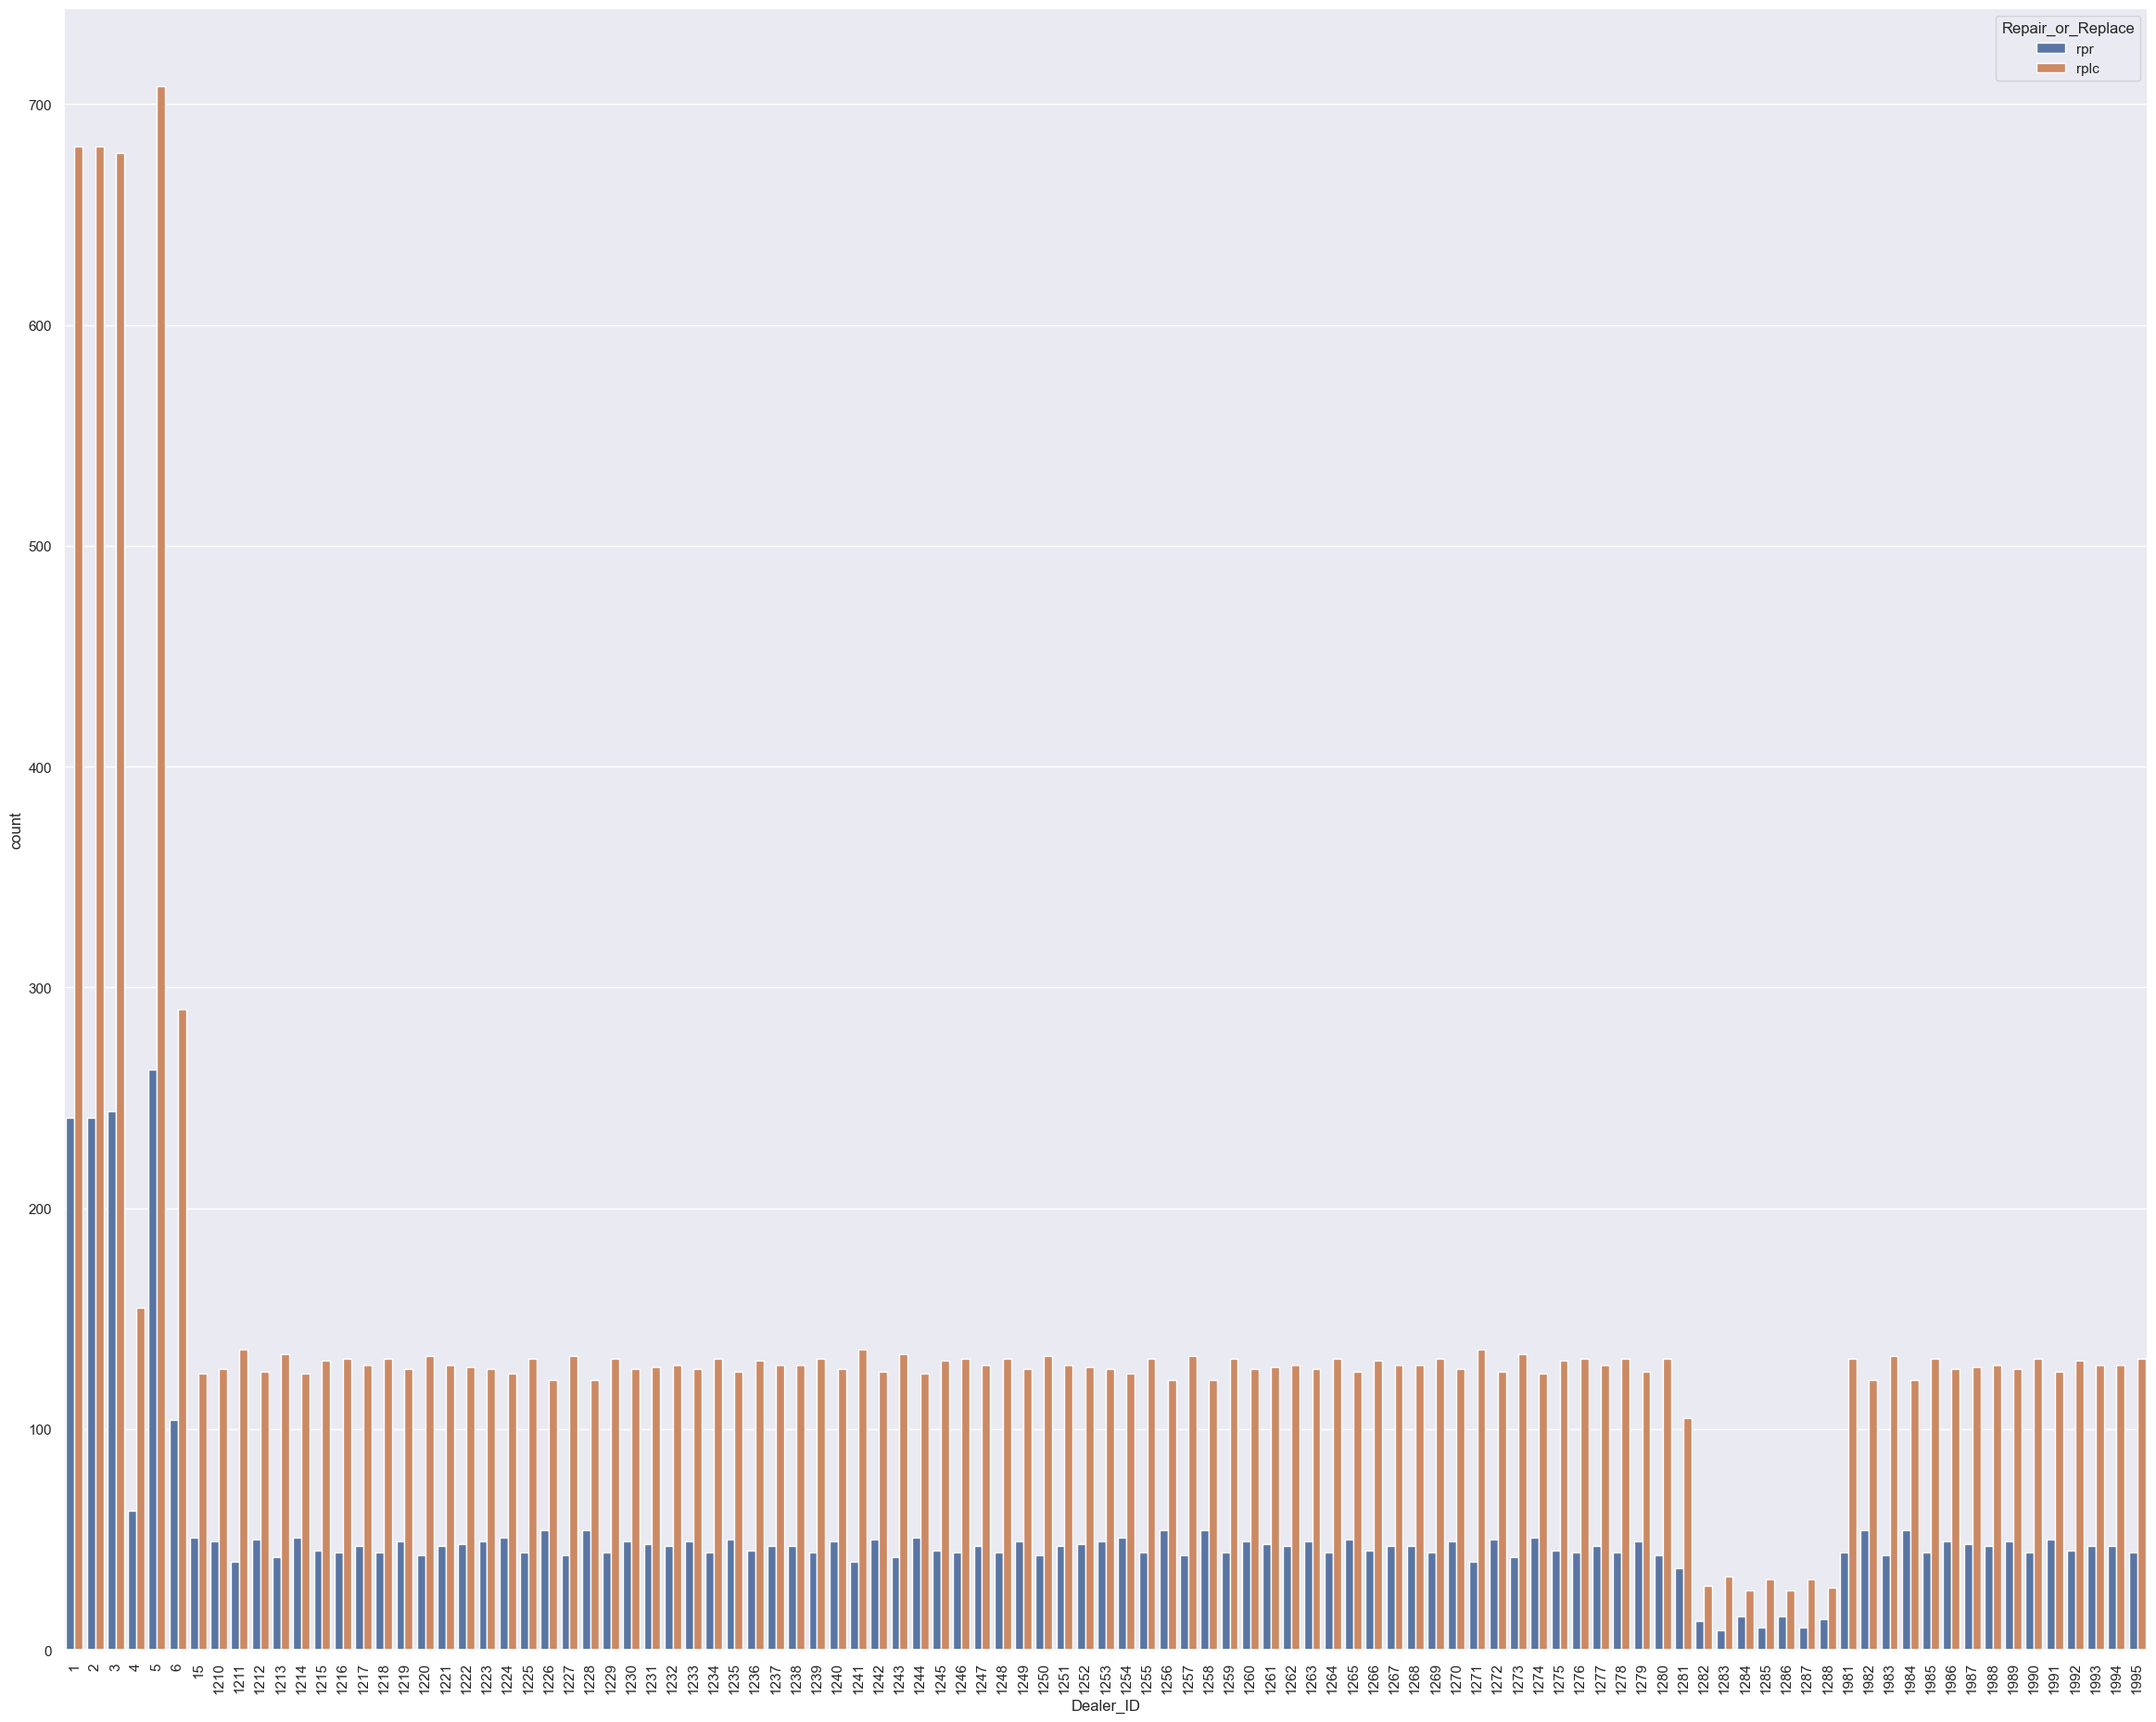

In [41]:
sns.set(rc={'figure.figsize':(29,23)})
plt.xticks(rotation=90)
sns.countplot(x =claims.Dealer_ID, data = claims,hue = claims.Repair_or_Replace )


In [42]:
print(claims['Repair_or_Replace'].value_counts()['rpr']) #no of claims with repair of parts

5359


In [43]:
print(claims['Repair_or_Replace'].value_counts()['rplc']) #no of claims with replacemet of parts

14736


<Axes: xlabel='Dealer_ID', ylabel='count'>

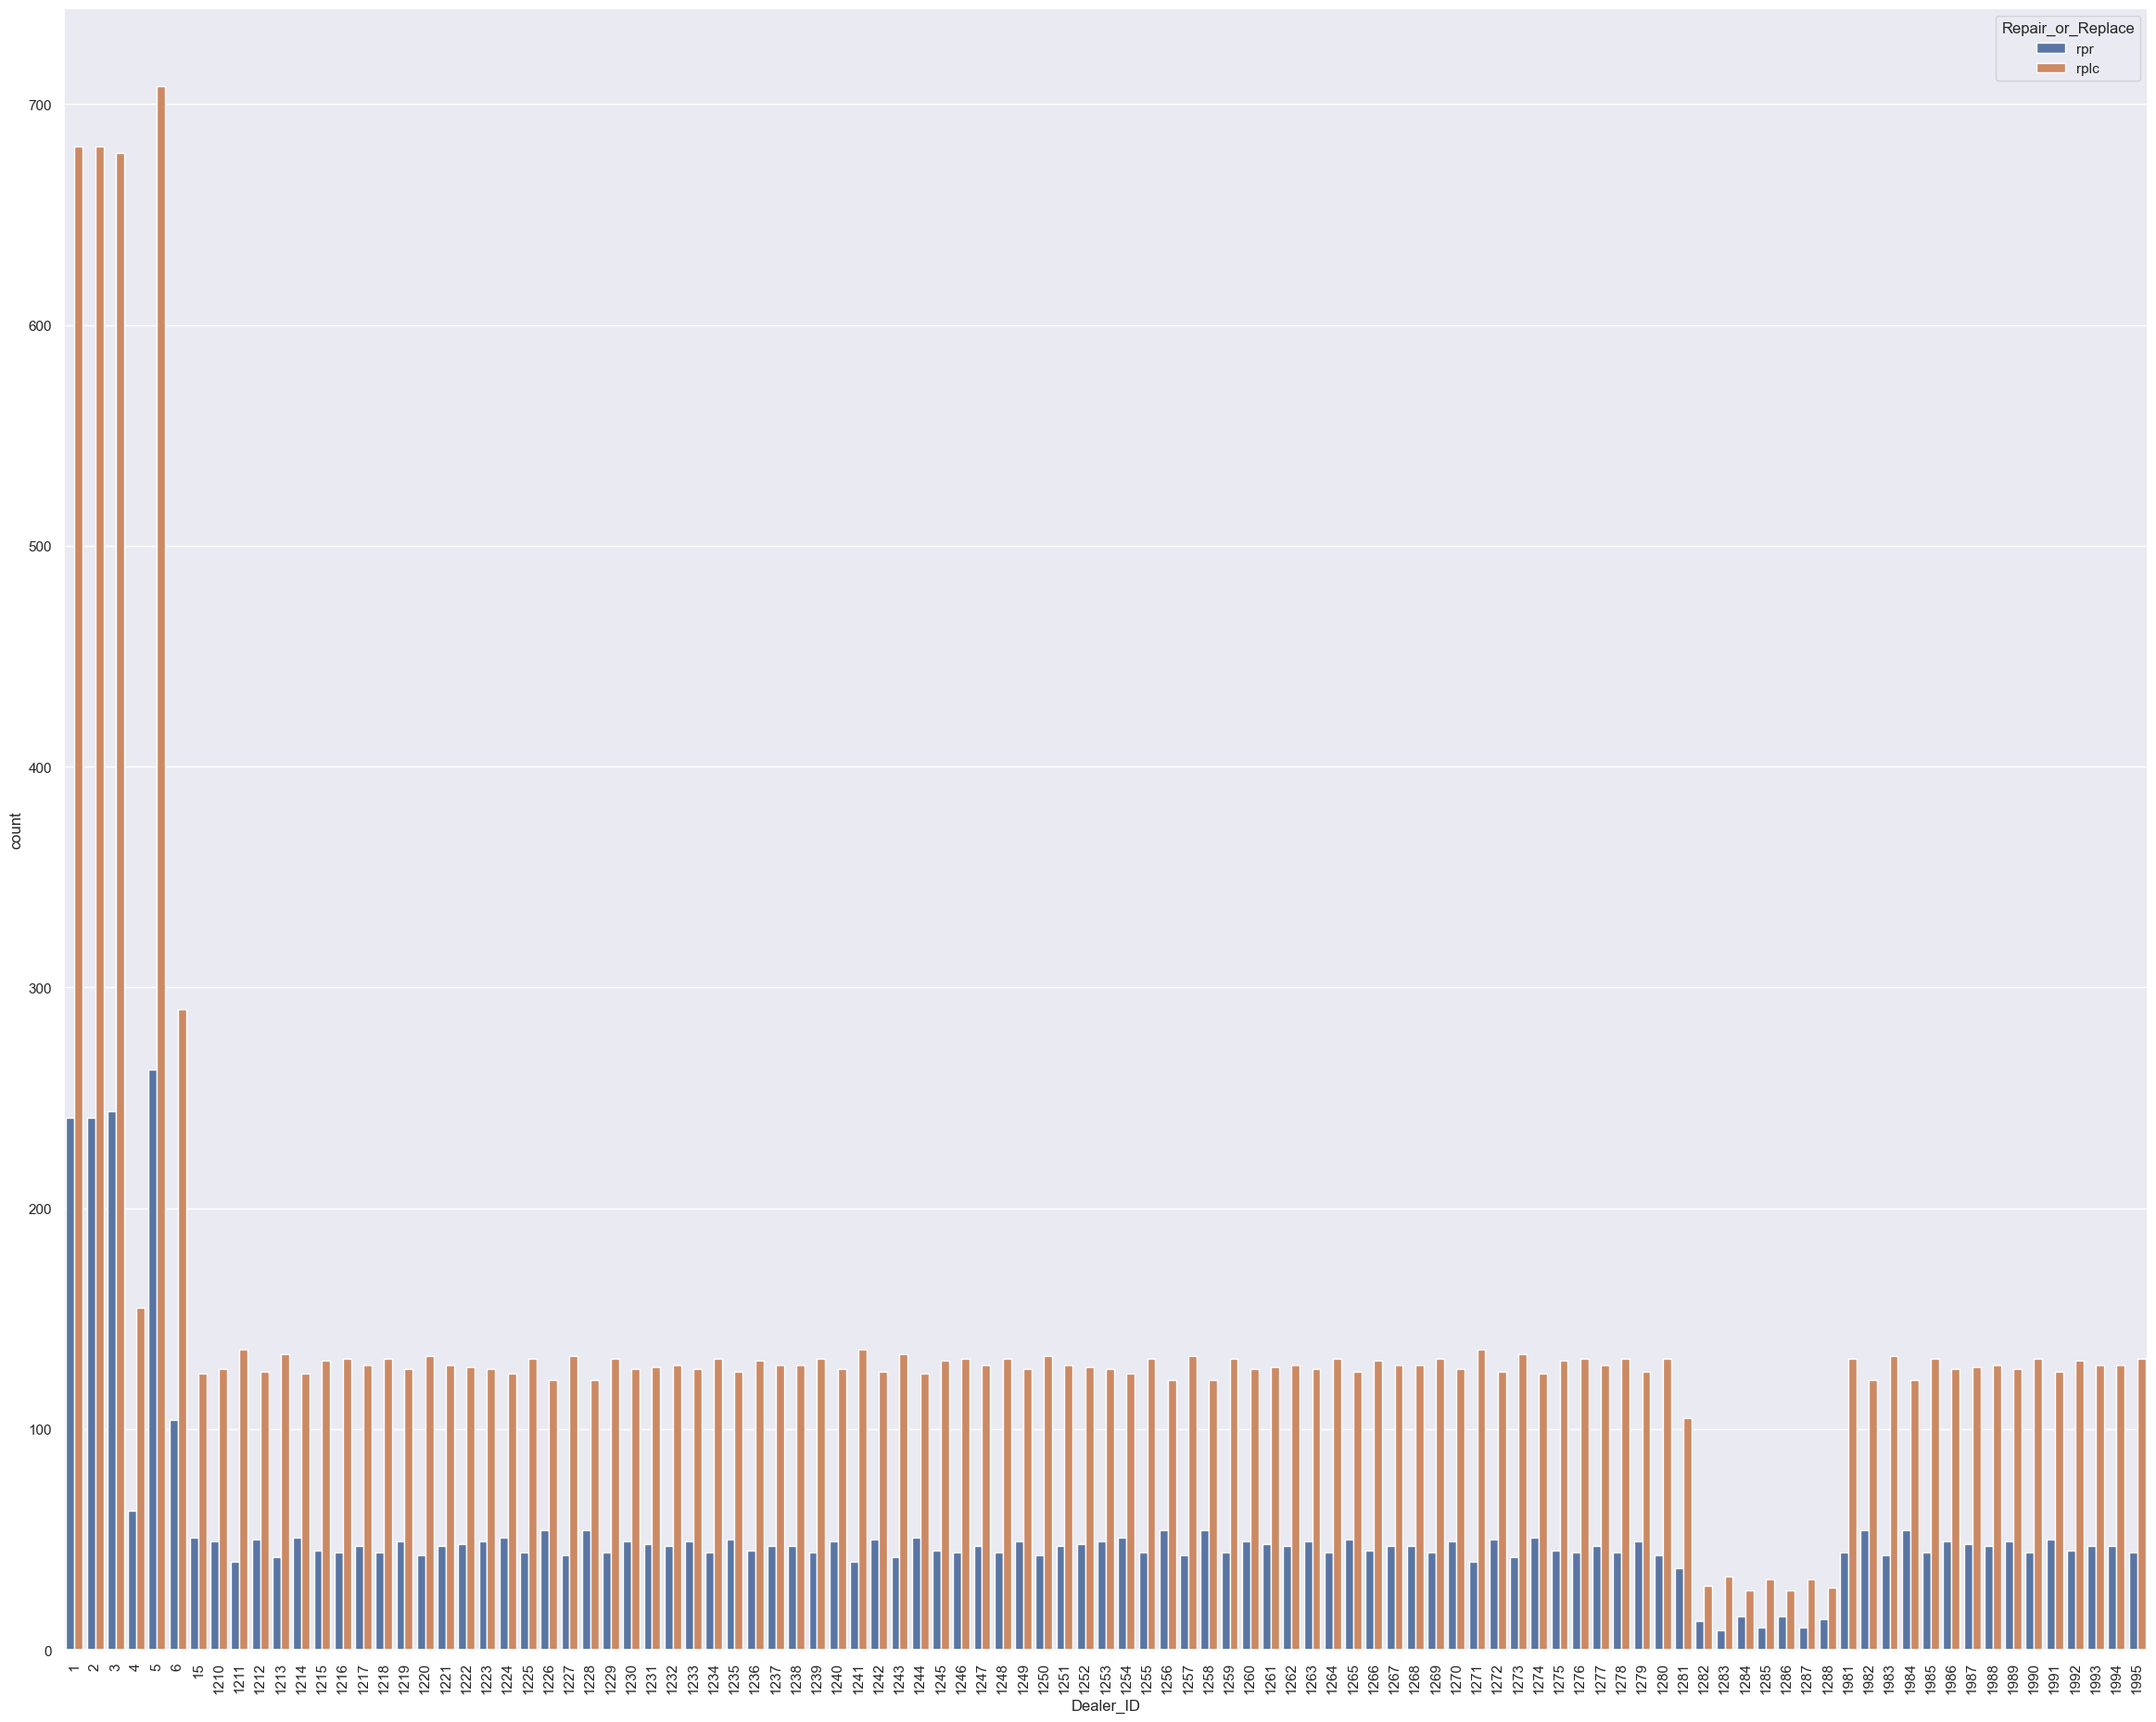

In [44]:
sns.set(rc={'figure.figsize':(29,23)})
plt.xticks(rotation=90)
sns.countplot(x =claims.Dealer_ID, data = claims,hue = claims.Repair_or_Replace )

In [45]:
#Parts

In [46]:
claims['Part_ID'].unique()     #no of parts in the data

array([901, 902, 903, 904, 905, 906, 907])

<Axes: xlabel='Part_ID', ylabel='count'>

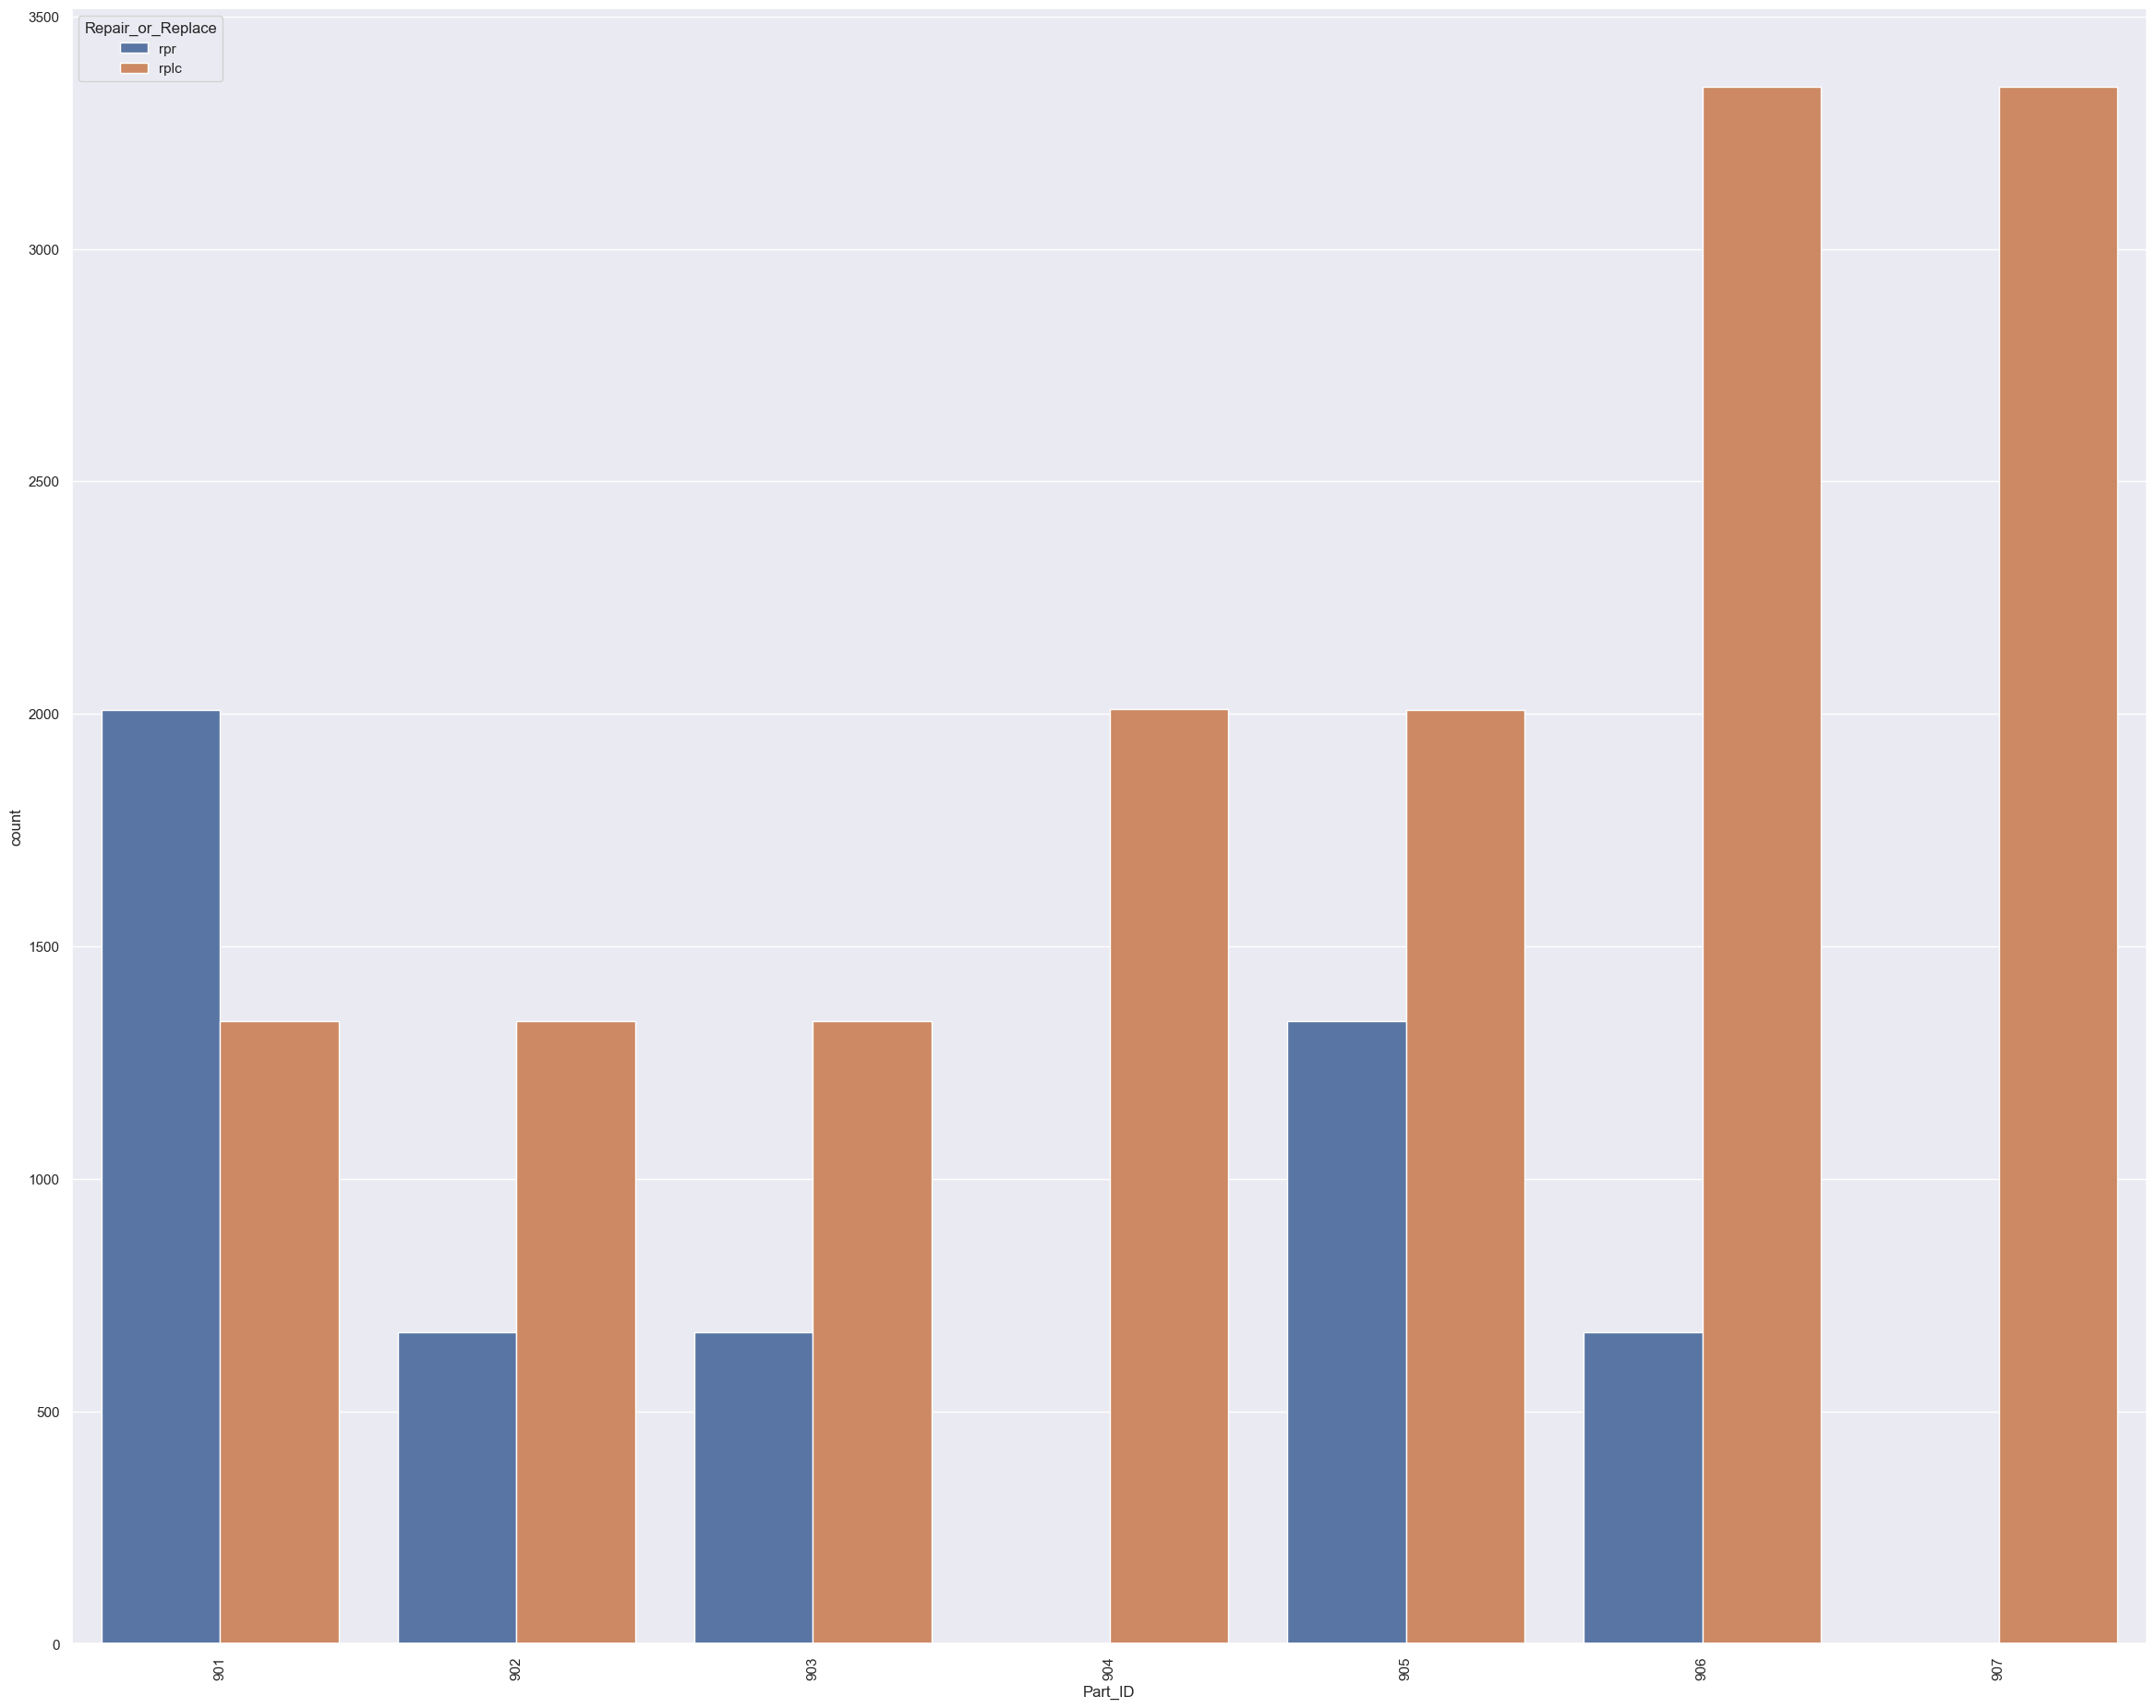

In [47]:
plt.xticks(rotation=90)
sns.countplot(x =claims.Part_ID, data = claims,hue = claims.Repair_or_Replace )

In [48]:
claims['Part_ID'].value_counts().nlargest(n=7)

906    4019
901    3349
905    3349
907    3348
902    2010
903    2010
904    2010
Name: Part_ID, dtype: int64

In [49]:
counts = claims.groupby('Part_ID')['Repair_or_Replace'].value_counts().reset_index(name='counts')


In [50]:
counts

,Part_ID,Repair_or_Replace,counts
0,901,rpr,2009
1,901,rplc,1340
2,902,rplc,1340
3,902,rpr,670
4,903,rplc,1340
5,903,rpr,670
6,904,rplc,2010
7,905,rplc,2009
8,905,rpr,1340
9,906,rplc,3349


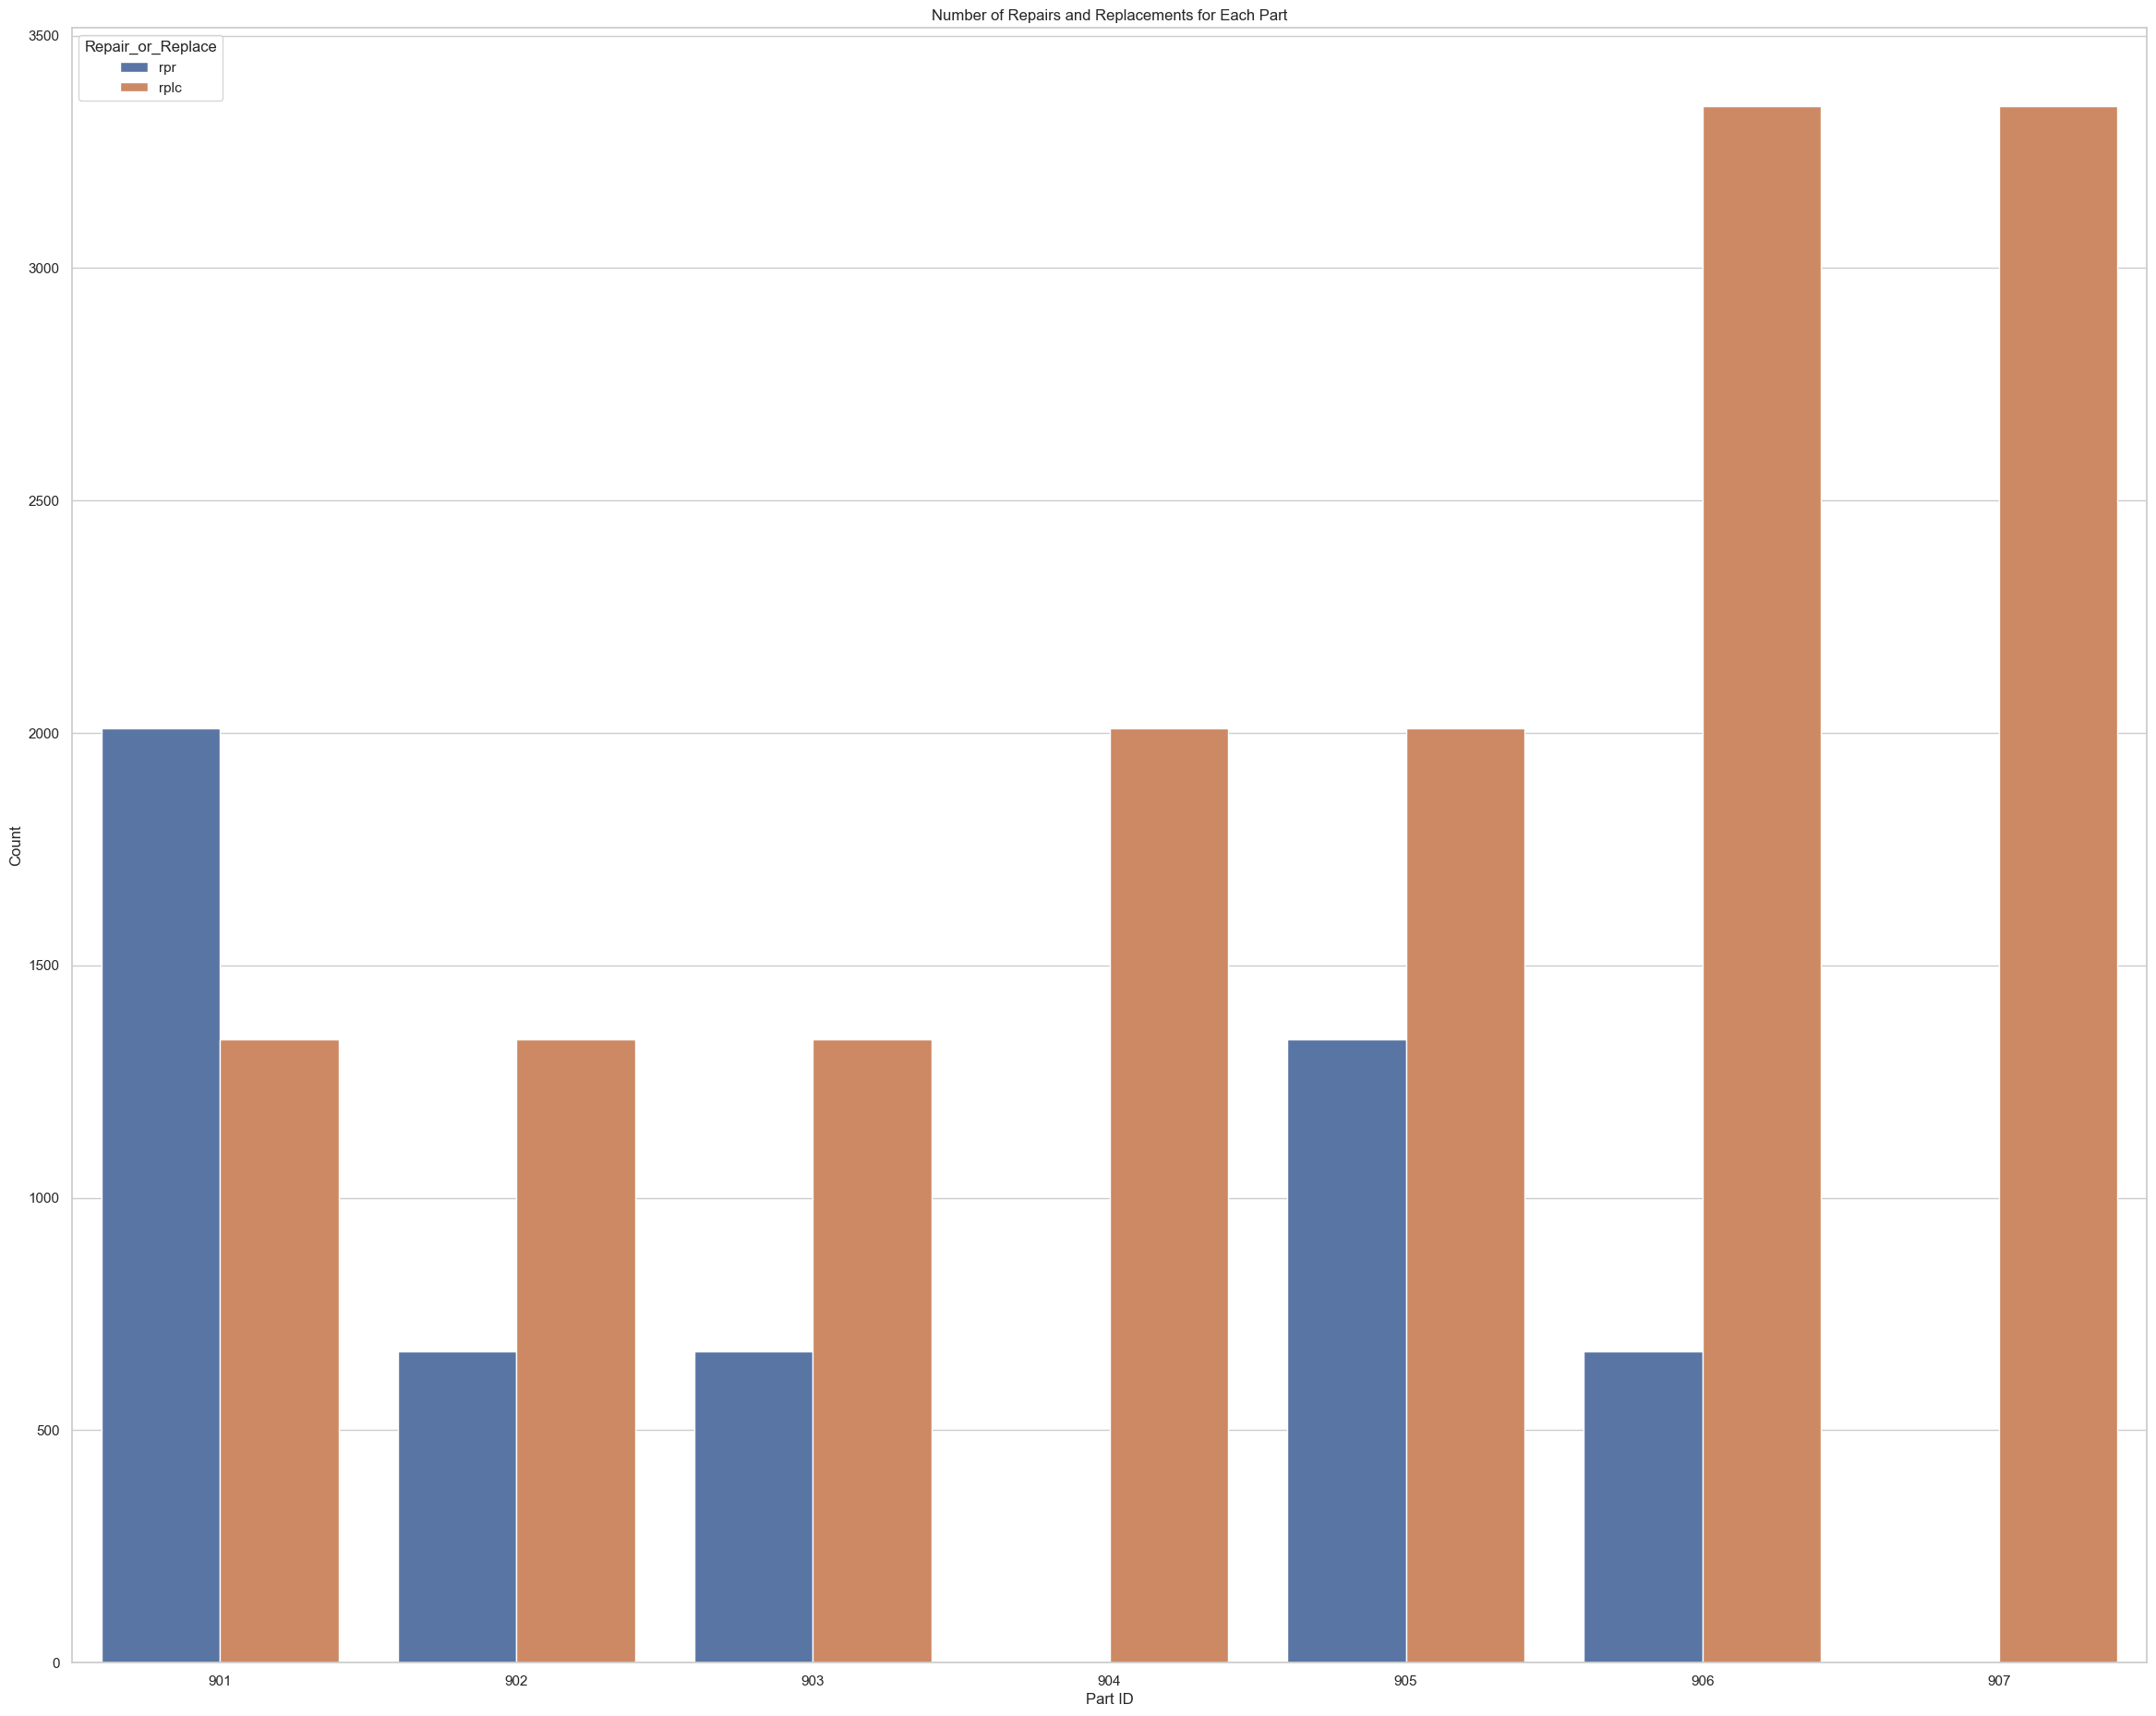

In [51]:
sns.set_style('whitegrid')
sns.barplot(x='Part_ID', y='counts', hue='Repair_or_Replace', data=counts)
plt.title('Number of Repairs and Replacements for Each Part')
plt.xlabel('Part ID')
plt.ylabel('Count')
plt.show()

# USECASE - 2

# Predict the parts that may fail according to the location, mileage and age

In [52]:
location = pd.merge(claims, dealers, on='Dealer_ID', how='left')

In [53]:
location

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Dealer_Name,Dealer_Country,State,City,zipcode
0,1,2020-04-01,36000,5,104,901,rpr,Lynn Knapp,india,Orrisa,Cuttack,400005
1,2,2020-04-01,42000,6,106,902,rplc,Harold Hamff,india,Maharashtra,Mumbai,400006
2,3,2020-04-01,45000,4,103,903,rpr,Rachel Oszust,india,Gujrat,Ahemdabad,400004
3,4,2020-04-01,56000,3,102,904,rplc,Donald Repinski,india,Karnataka,Bangalore,400003
4,5,2020-04-01,39000,2,105,905,rpr,Owen Mclaughlin,india,Delhi,Naoida,400002
...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,Eileen Romero,india,Gujrat,Ahemdabad,400004
20091,20092,2021-01-24,36000,1275,43975,907,rplc,Lois Landfair,india,Orrisa,Cuttack,400005
20092,20093,2021-01-24,46000,1276,43976,905,rplc,Nathan Oregel,india,Maharashtra,Mumbai,400006
20093,20094,2021-01-24,56000,1277,43977,904,rplc,Dwight Wies,india,Goa,Panji,400001


In [54]:
# location.to_csv("D:/gsf/location.csv")

In [55]:
location['claim_date'] = pd.to_datetime(location['claim_date'])

In [56]:
location

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Dealer_Name,Dealer_Country,State,City,zipcode
0,1,2020-04-01,36000,5,104,901,rpr,Lynn Knapp,india,Orrisa,Cuttack,400005
1,2,2020-04-01,42000,6,106,902,rplc,Harold Hamff,india,Maharashtra,Mumbai,400006
2,3,2020-04-01,45000,4,103,903,rpr,Rachel Oszust,india,Gujrat,Ahemdabad,400004
3,4,2020-04-01,56000,3,102,904,rplc,Donald Repinski,india,Karnataka,Bangalore,400003
4,5,2020-04-01,39000,2,105,905,rpr,Owen Mclaughlin,india,Delhi,Naoida,400002
...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,Eileen Romero,india,Gujrat,Ahemdabad,400004
20091,20092,2021-01-24,36000,1275,43975,907,rplc,Lois Landfair,india,Orrisa,Cuttack,400005
20092,20093,2021-01-24,46000,1276,43976,905,rplc,Nathan Oregel,india,Maharashtra,Mumbai,400006
20093,20094,2021-01-24,56000,1277,43977,904,rplc,Dwight Wies,india,Goa,Panji,400001


In [57]:
location['claim_date'] = location['claim_date'].dt.strftime('%Y%m%d')

In [58]:
location

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Dealer_Name,Dealer_Country,State,City,zipcode
0,1,20200401,36000,5,104,901,rpr,Lynn Knapp,india,Orrisa,Cuttack,400005
1,2,20200401,42000,6,106,902,rplc,Harold Hamff,india,Maharashtra,Mumbai,400006
2,3,20200401,45000,4,103,903,rpr,Rachel Oszust,india,Gujrat,Ahemdabad,400004
3,4,20200401,56000,3,102,904,rplc,Donald Repinski,india,Karnataka,Bangalore,400003
4,5,20200401,39000,2,105,905,rpr,Owen Mclaughlin,india,Delhi,Naoida,400002
...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,20210124,53000,1274,43974,906,rplc,Eileen Romero,india,Gujrat,Ahemdabad,400004
20091,20092,20210124,36000,1275,43975,907,rplc,Lois Landfair,india,Orrisa,Cuttack,400005
20092,20093,20210124,46000,1276,43976,905,rplc,Nathan Oregel,india,Maharashtra,Mumbai,400006
20093,20094,20210124,56000,1277,43977,904,rplc,Dwight Wies,india,Goa,Panji,400001


In [59]:
df = location.copy()

In [60]:
df

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Dealer_Name,Dealer_Country,State,City,zipcode
0,1,20200401,36000,5,104,901,rpr,Lynn Knapp,india,Orrisa,Cuttack,400005
1,2,20200401,42000,6,106,902,rplc,Harold Hamff,india,Maharashtra,Mumbai,400006
2,3,20200401,45000,4,103,903,rpr,Rachel Oszust,india,Gujrat,Ahemdabad,400004
3,4,20200401,56000,3,102,904,rplc,Donald Repinski,india,Karnataka,Bangalore,400003
4,5,20200401,39000,2,105,905,rpr,Owen Mclaughlin,india,Delhi,Naoida,400002
...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20091,20210124,53000,1274,43974,906,rplc,Eileen Romero,india,Gujrat,Ahemdabad,400004
20091,20092,20210124,36000,1275,43975,907,rplc,Lois Landfair,india,Orrisa,Cuttack,400005
20092,20093,20210124,46000,1276,43976,905,rplc,Nathan Oregel,india,Maharashtra,Mumbai,400006
20093,20094,20210124,56000,1277,43977,904,rplc,Dwight Wies,india,Goa,Panji,400001


In [61]:
labelencoder = LabelEncoder()
df['claim_date'] = labelencoder.fit_transform(df['claim_date'])
df['Dealer_ID'] = labelencoder.fit_transform(df['Dealer_ID'])
df['Repair_or_Replace'] = labelencoder.fit_transform(df['Repair_or_Replace'])
df['State'] = labelencoder.fit_transform(df['State'])
df['City'] = labelencoder.fit_transform(df['City'])
df['zipcode'] = labelencoder.fit_transform(df['zipcode'])
df['Dealer_Name'] = labelencoder.fit_transform(df['Dealer_Name'])
df['Dealer_Country'] = labelencoder.fit_transform(df['Dealer_Country'])

#  Train the decision tree classifier model for parts which may fails according to location.

In [62]:
X = df[['Repair_or_Replace','Dealer_ID','Dealer_Name','Dealer_Country', 'State', 'City', 'zipcode']]
y = df['Part_ID']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [64]:
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)

C:\Users\Nikam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [65]:
y_pred = clf.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2705066344993969


In [ ]:
clf.predict([[]])

In [67]:
X

,Repair_or_Replace,Dealer_ID,Dealer_Name,Dealer_Country,State,City,zipcode
0,1,4,64,0,5,2,4
1,0,5,40,0,4,3,5
2,1,3,81,0,2,0,3
3,0,2,30,0,3,1,2
4,1,1,76,0,0,4,1
...,...,...,...,...,...,...,...
20090,0,71,35,0,2,0,3
20091,0,72,62,0,5,2,4
20092,0,73,71,0,4,3,5
20093,0,74,33,0,1,5,0


In [68]:
df.corr()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Dealer_Name,Dealer_Country,State,City,zipcode
claim_id,1.000000,0.458077,0.000214,0.002443,-0.000791,0.000189,-0.000169,-0.000640,NaN,-0.000025,-0.000109,0.000158
claim_date,0.458077,1.000000,0.000316,0.003298,0.005011,0.000405,-0.000259,-0.000785,NaN,-0.000112,-0.000292,0.000164
claim_amount,0.000214,0.000316,1.000000,-0.001180,-0.001481,-0.285543,-0.264751,0.003375,NaN,-0.002193,0.000156,-0.001569
Dealer_ID,0.002443,0.003298,-0.001180,1.000000,0.016361,-0.003319,0.001176,-0.008319,NaN,0.010256,-0.021650,0.069496
Cust_ID,-0.000791,0.005011,-0.001481,0.016361,1.000000,0.002312,-0.001301,0.002518,NaN,-0.001369,0.003582,-0.004365
Part_ID,0.000189,0.000405,-0.285543,-0.003319,0.002312,1.000000,-0.364181,0.001234,NaN,-0.004127,0.003185,-0.002952
Repair_or_Replace,-0.000169,-0.000259,-0.264751,0.001176,-0.001301,-0.364181,1.000000,-0.006532,NaN,0.004191,-0.003162,0.000325
Dealer_Name,-0.000640,-0.000785,0.003375,-0.008319,0.002518,0.001234,-0.006532,1.000000,NaN,-0.169815,0.069701,-0.078104
Dealer_Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,-0.000025,-0.000112,-0.002193,0.010256,-0.001369,-0.004127,0.004191,-0.169815,NaN,1.000000,-0.487132,0.833263


#  Predictions for parts which may fails according to mileage which is total kms completed by part_id Using Random forest regressor and  linear regression

In [69]:
claims['mileage'] = [random.randint(5000, 100000) for _ in range(len(claims))]

In [70]:
claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,mileage
0,1,2020-04-01,36000,5,104,901,rpr,52814
1,2,2020-04-01,42000,6,106,902,rplc,37019
2,3,2020-04-01,45000,4,103,903,rpr,90604
3,4,2020-04-01,56000,3,102,904,rplc,79923
4,5,2020-04-01,39000,2,105,905,rpr,71187
...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,95390
20091,20092,2021-01-24,36000,1275,43975,907,rplc,18155
20092,20093,2021-01-24,46000,1276,43976,905,rplc,8965
20093,20094,2021-01-24,56000,1277,43977,904,rplc,49886


In [71]:
claims.corr()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,mileage
claim_id,1.000000,0.000214,0.002988,-0.000791,0.000189,-0.002903
claim_amount,0.000214,1.000000,-0.000154,-0.001481,-0.285543,0.000338
Dealer_ID,0.002988,-0.000154,1.000000,0.007710,-0.002561,-0.002315
Cust_ID,-0.000791,-0.001481,0.007710,1.000000,0.002312,-0.010285
Part_ID,0.000189,-0.285543,-0.002561,0.002312,1.000000,0.015527
mileage,-0.002903,0.000338,-0.002315,-0.010285,0.015527,1.000000


In [72]:
data = claims.copy()

In [73]:
# data.to_csv("D:/gsf/data.csv")

In [74]:
labelencoder = LabelEncoder()
data['mileage'] = labelencoder.fit_transform(data['mileage'])
data['Part_ID'] = labelencoder.fit_transform(data['Part_ID'])
data['Repair_or_Replace'] = labelencoder.fit_transform(data['Repair_or_Replace'])
data['claim_date'] = labelencoder.fit_transform(data['claim_date'])

In [75]:
data.describe()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,mileage
count,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000,20095.000000
mean,10048.000000,276.556308,47032.843991,1063.908236,84153.946803,3.266434,0.266683,9074.198756
std,5801.071165,75.182015,12040.003994,622.151033,109806.201548,2.096525,0.442236,5235.034392
min,1.000000,0.000000,25000.000000,1.000000,101.000000,0.000000,0.000000,0.000000
25%,5024.500000,298.000000,37000.000000,1212.000000,126.000000,1.000000,0.000000,4529.500000
50%,10048.000000,298.000000,48000.000000,1241.000000,43934.000000,4.000000,0.000000,9069.000000
75%,15071.500000,298.000000,56000.000000,1269.000000,103320.000000,5.000000,1.000000,13620.500000
max,20095.000000,298.000000,69000.000000,1995.000000,287996.000000,6.000000,1.000000,18133.000000


In [130]:
X = data['Part_ID'].values.reshape(-1,1)
y = data['mileage'].values.reshape(-1,1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

C:\Users\Nikam\AppData\Local\Temp\ipykernel_11416\4087473714.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [133]:
y_pred = rf.predict(X_test)

In [134]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)
accuracy = rf.score(X, y)
print('Model accuracy (R^2):', accuracy)

Mean Squared Error: 27940905.42810692
R-Squared Score: -3.50532311184093e-05
Model accuracy (R^2): 0.0008828986713855791


In [140]:
rf.predict([[3]])

array([8888.13649268])

#  Prediction for parts which may fails according to age

In [82]:
age = pd.merge(claims, parts, on="Part_ID")

In [83]:
# Convert the claim_date and Manf_Date columns to datetime format
age["claim_date"] = pd.to_datetime(age["claim_date"])
age["Manf_Date"] = pd.to_datetime(age["Manf_Date"])

In [84]:
age["age"] = (age["claim_date"] - age["Manf_Date"]).dt.days

In [129]:
age

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,mileage,Part_Name,Manufacturer_ID,Manf_Date,age
0,1,2020-04-01,36000,5,104,901,rpr,52814,brake pad,501,1996-08-12,8633
1,7,2020-04-01,53000,5,110,901,rplc,74844,brake pad,501,1996-08-12,8633
2,14,2020-04-01,54000,2,112,901,rpr,36281,brake pad,501,1996-08-12,8633
3,17,2020-04-01,61000,5,118,901,rplc,34283,brake pad,501,1996-08-12,8633
4,30,2020-04-01,57000,2,126,901,rpr,72871,brake pad,501,1996-08-12,8633
...,...,...,...,...,...,...,...,...,...,...,...,...
20090,20066,2021-01-24,25000,1249,43949,907,rplc,86969,clutch kits,503,1997-05-12,8658
20091,20068,2021-01-24,53000,1251,43951,907,rplc,7616,clutch kits,503,1997-05-12,8658
20092,20080,2021-01-24,29000,1263,43963,907,rplc,91838,clutch kits,503,1997-05-12,8658
20093,20086,2021-01-24,53000,1269,43969,907,rplc,59699,clutch kits,503,1997-05-12,8658


In [128]:
age.Part_Name.unique()

array(['brake pad', 'axle ', 'tie rod', 'differential', 'rear suspension',
       'radiator', 'clutch kits'], dtype=object)

In [86]:
y =  age['age'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
arf = RandomForestRegressor(n_estimators=100, random_state=42)
arf.fit(X_train, y_train)

C:\Users\Nikam\AppData\Local\Temp\ipykernel_11416\1915451015.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  arf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [88]:
y_pred = arf.predict(X_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared Score:", r2)
accuracy = arf.score(X, y)
print('Model accuracy (R^2):', accuracy)

Mean Squared Error: 27377.412078193942
R-Squared Score: -0.4761894143718921
Model accuracy (R^2): 0.510179361954147


In [90]:
claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,mileage
0,1,2020-04-01,36000,5,104,901,rpr,52814
1,2,2020-04-01,42000,6,106,902,rplc,37019
2,3,2020-04-01,45000,4,103,903,rpr,90604
3,4,2020-04-01,56000,3,102,904,rplc,79923
4,5,2020-04-01,39000,2,105,905,rpr,71187
...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,95390
20091,20092,2021-01-24,36000,1275,43975,907,rplc,18155
20092,20093,2021-01-24,46000,1276,43976,905,rplc,8965
20093,20094,2021-01-24,56000,1277,43977,904,rplc,49886


In [91]:
claims1 = claims.copy()

In [92]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [93]:
labelencoder = LabelEncoder()
claims1['Part_ID'] = labelencoder.fit_transform(claims1['Part_ID'])
claims1['Dealer_ID'] = labelencoder.fit_transform(claims1['Dealer_ID'])
claims1['Repair_or_Replace'] = labelencoder.fit_transform(claims1['Repair_or_Replace'])

In [94]:
claims1

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,mileage
0,1,2020-04-01,36000,4,104,0,1,52814
1,2,2020-04-01,42000,5,106,1,0,37019
2,3,2020-04-01,45000,3,103,2,1,90604
3,4,2020-04-01,56000,2,102,3,0,79923
4,5,2020-04-01,39000,1,105,4,1,71187
...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,71,43974,5,0,95390
20091,20092,2021-01-24,36000,72,43975,6,0,18155
20092,20093,2021-01-24,46000,73,43976,4,0,8965
20093,20094,2021-01-24,56000,74,43977,3,0,49886


In [95]:

X = claims1[["Dealer_ID","Part_ID"]]
y = df["Repair_or_Replace"] # target variable


In [96]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [98]:
print("Decision Tree accuracy:", dtc.score(X_test, y_test))

Decision Tree accuracy: 0.7556606120925603


In [99]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
# evaluate Random Forest classifier
print("Random Forest accuracy:", rfc.score(X_test, y_test))


Random Forest accuracy: 0.7504354316994277


In [109]:
claims["Dealer_ID"].unique()

array([   5,    6,    4,    3,    2,    1,   15, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220,
       1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231,
       1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242,
       1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253,
       1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264,
       1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275,
       1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286,
       1287, 1288])

In [108]:
claims1["Part_ID"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [127]:
rfc.predict([[1220,0]])

C:\Users\Nikam\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [120]:
rfc.predict([[1252,5]])

C:\Users\Nikam\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [102]:
df3 = claims.copy()

In [103]:
feedback_dict = {
    'Product is great!': 5,
    'Not satisfied with the product ': 1,
    'Fast delivery! ': 5,
    'Slow delivery': 3,
    'Great customer service!': 5,
    'Poor customer service': 2,
    'Product arrived damaged': 1,
    'Product exceeded my expectations': 5,
    'Product did not meet my expectations': 2,
    'Would recommend to others': 5,
    'Would not recommend to others': 1,
    'Excellent': 5,
    'Great': 5,
    'Good': 3,
    'Fair': 4,
    'Poor': 2,
    'Very poor': 1,
    'Satisfactory': 4,
    'Unsatisfactory': 2,
    'Outstanding': 4,
    'Terrible': 1,
    'Amazing': 5,
    'Average': 3,
    'Not bad': 3,
    'Could be better': 4,
    'Needs improvement': 3,
    'Excellent service!': 5,
    'Fast and efficient process.': 5,
    'Friendly and helpful staff.': 5,
    'Great value for money.': 5,
    'Smooth and seamless experience.': 5,
    'Prompt response to my claim.': 4,
    'Very satisfied with the outcome.': 4,
    'The repair work was top-notch.': 5,
    'Impressed with the level of professionalism.': 5,
    'Overall, a great experience.': 5,
    'I appreciate the attention to detail.': 5,
    'The customer service was outstanding.': 5,
    'Effortless and hassle-free process.': 5,
    'The claim was processed quickly.': 5,
    'Highly recommended!': 5,
    'Very impressed with the service.': 5,
    'The staff went above and beyond.': 5,
    'Thoroughly impressed with the outcome.': 4,
    'The repair work was excellent.': 5,
    'Thank you for the great service!': 5,
    "I couldn't be happier with the result.": 2,
    'The customer service exceeded my expectations.': 5,
    'The whole process was seamless.': 4,
    'I felt valued as a customer.': 5,
    'The level of care and attention was impressive.': 5,
    'Thank you for making it so easy.': 5,
    'The claim process was straightforward.': 5,
    'Excellent communication throughout the process.': 5,
    'The outcome was exactly what I was hoping for.': 5,
    'Great service, great staff!': 5,
    'The staff were friendly and professional.': 5,
    'The repair work was done to a high standard.': 4,
    'I appreciate the transparency and honesty.': 5,
    'The customer service team were fantastic.': 5,
    'The process was efficient and effective.': 5,
    'I was kept informed every step of the way.': 5,
    'The outcome exceeded my expectations.': 5,
    'Excellent value for money.': 5,
    'The staff were knowledgeable and helpful.': 5,
    'I would definitely recommend this service.': 4,
    'The repair work was completed quickly and efficiently.': 5}
   


In [104]:
import random

# create empty lists to store the feedbacks and ratings
feedbacks = []
ratings = []

# loop through each row in the dataframe and randomly select a feedback and rating
for i in range(len(df3)):
    feedback, rating = random.choice(list(feedback_dict.items()))
    feedbacks.append(feedback)
    ratings.append(rating)

# add the feedback and rating columns to the dataframe
df3['feedback'] = feedbacks
df3['rating'] = ratings


In [105]:
df3.head(60)

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,mileage,feedback,rating
0,1,2020-04-01,36000,5,104,901,rpr,52814,Poor customer service,2
1,2,2020-04-01,42000,6,106,902,rplc,37019,Slow delivery,3
2,3,2020-04-01,45000,4,103,903,rpr,90604,I appreciate the transparency and honesty.,5
3,4,2020-04-01,56000,3,102,904,rplc,79923,The claim process was straightforward.,5
4,5,2020-04-01,39000,2,105,905,rpr,71187,The repair work was top-notch.,5
5,6,2020-04-01,48000,1,101,906,rplc,56468,Would recommend to others,5
6,7,2020-04-01,53000,5,110,901,rplc,74844,Prompt response to my claim.,4
7,8,2020-04-01,59000,4,124,903,rplc,31215,Would recommend to others,5
8,9,2020-04-01,25000,6,109,906,rpr,14109,Highly recommended!,5
9,10,2020-04-01,29000,3,115,907,rplc,35615,The staff were friendly and professional.,5


In [106]:
import tensorflow as tf
from tensorflow.keras import layers, models

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
labelencoder = LabelEncoder()
df3['Repair_or_Replace'] = labelencoder.fit_transform(df3['Repair_or_Replace'])

In [ ]:
X = df3[['claim_amount','Dealer_ID','Cust_ID','Part_ID','Repair_or_Replace']]
y = df3['feedback']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)